# Enterococcus Levels IS608 Module 4
Sharon Morris, 
October 22, 2017

## Load and Clean the data
### Examine the data

In [551]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

In [552]:
df = pd.read_csv('https://raw.githubusercontent.com/indianspice/IS608/master/Assign4/riverkeeper_data_2013.csv')


In [553]:
df.head()

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
0,Hudson above Mohawk River,10/16/2011,1733,1.5,35
1,Hudson above Mohawk River,10/21/2013,4,0.2,35
2,Hudson above Mohawk River,9/21/2013,20,0.0,35
3,Hudson above Mohawk River,8/19/2013,6,0.0,35
4,Hudson above Mohawk River,7/21/2013,31,0.0,35


In [554]:
df.tail()

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
3392,Gowanus Canal,9/6/2007,<10,0.0,37
3393,Gowanus Canal,8/16/2007,35,0.0,37
3394,Gowanus Canal,7/11/2007,238,1.0,37
3395,Gowanus Canal,6/18/2007,6,0.0,37
3396,Gowanus Canal,6/10/2010,882,0.9,37


In [555]:
#View number of observations
df.shape

(3397, 5)

In [556]:
#Examine columns
df.columns

Index([u'Site', u'Date', u'EnteroCount', u'FourDayRainTotal', u'SampleCount'], dtype='object')

In [557]:
df.dtypes

Site                 object
Date                 object
EnteroCount          object
FourDayRainTotal    float64
SampleCount           int64
dtype: object

### Fix data issues

In [558]:
df['EnteroCount'].replace('<', "", regex=True, inplace=True)

In [559]:
df['EnteroCount'].replace('>', "", regex=True, inplace=True)

In [560]:
df['EnteroCount'] = df['EnteroCount'].astype(int)

In [561]:
df['Date'] = pd.to_datetime(df['Date'])

In [562]:
df.dtypes

Site                        object
Date                datetime64[ns]
EnteroCount                  int64
FourDayRainTotal           float64
SampleCount                  int64
dtype: object

## Frequency counts

In [563]:
df.Date.value_counts(dropna=False).head()

2011-05-19    27
2010-06-18    25
2013-09-21    24
2009-07-31    23
2010-09-14    23
Name: Date, dtype: int64

In [564]:
df.EnteroCount.value_counts(dropna=False).head()

10    817
20    148
1     121
2      83
4      78
Name: EnteroCount, dtype: int64

In [565]:
df.FourDayRainTotal.value_counts(dropna=False).head()

0.0    1266
0.1     289
0.2     263
0.5     206
0.3     190
Name: FourDayRainTotal, dtype: int64

In [566]:
df.SampleCount.value_counts(dropna=False).head()

36    432
38    380
35    315
37    259
47    235
Name: SampleCount, dtype: int64

In [567]:
df.Site.value_counts(dropna=False).head()

Piermont Pier            187
Upper Sparkill Creek     165
125th St. Pier            66
Nyack Launch Ramp         61
TZ Bridge mid-channel     57
Name: Site, dtype: int64

## Summary statistics  

In [568]:
df.describe()

,EnteroCount,FourDayRainTotal,SampleCount
count,3397.000000,3397.000000,3397.000000
mean,387.747719,0.568001,56.886370
std,2046.114024,1.000387,41.588476
min,0.000000,0.000000,27.000000
25%,10.000000,0.000000,37.000000
50%,18.000000,0.200000,42.000000
75%,85.000000,0.700000,50.000000
max,24196.000000,8.500000,187.000000


## Visualize data
Data visualization is being done to spot outliers, obvious errors and to view patterns

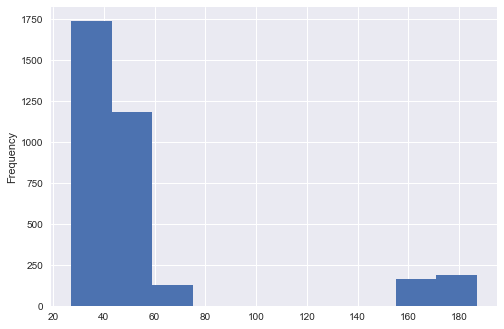

In [569]:
df.SampleCount.plot('hist')
plt.show()

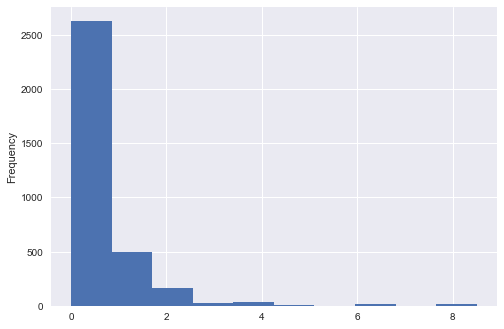

In [570]:
df.FourDayRainTotal.plot('hist')
plt.show()

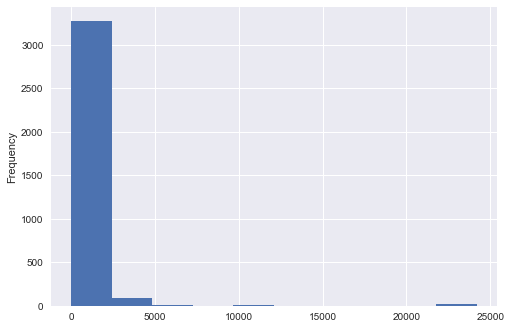

In [571]:
df.EnteroCount.plot('hist')
plt.show()

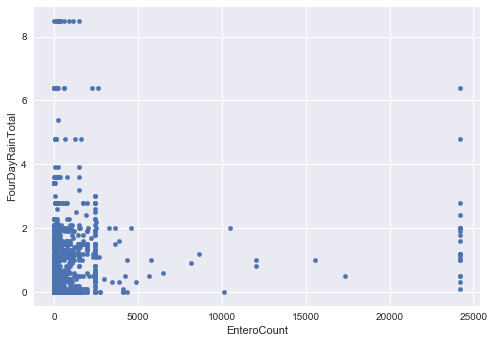

In [572]:
df.plot.scatter(x='EnteroCount', y='FourDayRainTotal')
plt.show()

#### Best and worst places to swim

In [573]:
#Calculate mean of each siteapply(lambda grp: grp.nlargest(2)
xbar = df.groupby('Site')['EnteroCount'].mean().reset_index()
                                                                   

In [574]:
wswim = xbar.sort_values('EnteroCount', ascending=False)[:10].reset_index(drop=True)
print(wswim)

                                      Site  EnteroCount
0                            Gowanus Canal  4206.837838
1  Newtown Creek- Metropolitan Ave. Bridge  2953.684211
2                         Tarrytown Marina  2205.666667
3                           Saw Mill River  1455.760000
4                     Upper Sparkill Creek  1296.072727
5               Newtown Creek- Dutch Kills  1205.087719
6      Kingsland Pt. Park- Pocantico River   907.857143
7                   Orangetown STP Outfall   854.192982
8                Mohawk River at Waterford   621.057143
9                            Piermont Pier   482.165775


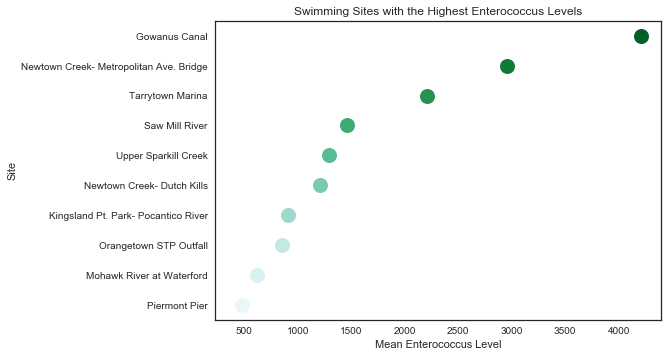

In [575]:
with plt.style.context('seaborn-white'):
    sns.swarmplot(x="EnteroCount", y="Site", size = 15, palette = "BuGn_r", data=wswim)
    plt.title("Swimming Sites with the Highest Enterococcus Levels")
    plt.xlabel("Mean Enterococcus Level")
    plt.show()

In [576]:
bswim = xbar.sort_values('EnteroCount')[:10].reset_index(drop=True)
print(bswim)

                                 Site  EnteroCount
0  Poughkeepsie Drinking Water Intake     8.342105
1                  Croton Point Beach    15.458333
2             Stony Point mid-channel    17.340909
3                  Little Stony Point    17.526316
4            Poughkeepsie Launch Ramp    17.675676
5          Haverstraw Bay mid-channel    18.708333
6               TZ Bridge mid-channel    21.438596
7                  Cold Spring Harbor    22.542857
8                 Yonkers mid-channel    25.019231
9                     Irvington Beach    28.805556


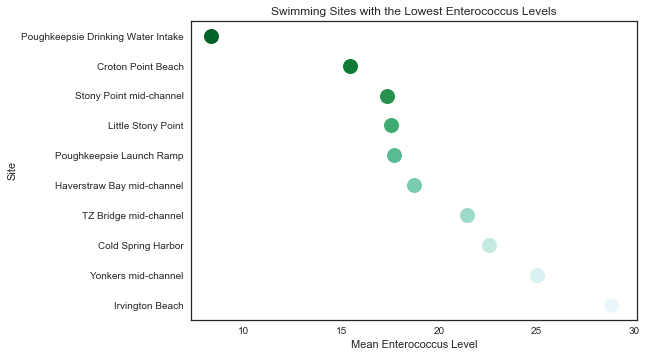

In [577]:
with plt.style.context('seaborn-white'):
    sns.swarmplot(x="EnteroCount", y="Site", size = 15, palette = "BuGn_r", data=bswim)
    plt.title("Swimming Sites with the Lowest Enterococcus Levels")
    plt.xlabel("Mean Enterococcus Level")
    plt.show()

#### The testing of water quality can be sporadic. Which sites have been tested most regularly? Which ones have long gaps between tests? Pick out 5-10 sites and visually compare how regularly their water quality is tested.¶

In [578]:
#Sort the dataframe
df1 = df.sort_values(['Site', 'Date'], ascending=[True, True])
df1.head()

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
2923,125th St. Pier,2006-10-02,1433,0.5,66
2919,125th St. Pier,2006-10-03,773,0.4,66
2917,125th St. Pier,2006-10-06,824,0.7,66
2916,125th St. Pier,2006-10-11,269,0.4,66
2915,125th St. Pier,2006-10-12,305,1.9,66


In [579]:
#Number of days since last test
df1["DaysSinceLast"] = df1.groupby('Site')['Date'].diff() / np.timedelta64(1, 'D')
df1['DaysSinceLast'] = df1['DaysSinceLast'].fillna(0)

df1.head()

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount,DaysSinceLast
2923,125th St. Pier,2006-10-02,1433,0.5,66,0.0
2919,125th St. Pier,2006-10-03,773,0.4,66,1.0
2917,125th St. Pier,2006-10-06,824,0.7,66,3.0
2916,125th St. Pier,2006-10-11,269,0.4,66,5.0
2915,125th St. Pier,2006-10-12,305,1.9,66,1.0


In [580]:
df2 = df1.groupby(['Site']).agg({
    "DaysSinceLast": {"Variability":  "std", "MinDaysBetweenTests":    "min",
    "MeanDaysBetween":    "mean", "MedianDaysBetween": "median",
    "MaxDaysBetween":    "max"}
}) 
df2.columns = df2.columns.droplevel(level=0) #Remove 2nd dimension

df2.head()

,Variability,MaxDaysBetween,MedianDaysBetween,MeanDaysBetween,MinDaysBetweenTests
Site,,,,,
125th St. Pier,65.247560,291.0,25.0,38.954545,0.0
79th St. mid-channel,65.730168,256.0,28.0,52.591837,0.0
Albany Rowing Dock,66.350991,232.0,29.5,54.944444,0.0
Annesville Creek,64.764021,231.0,28.0,52.000000,0.0
Athens,67.065088,232.0,30.0,55.742857,0.0


In [581]:
#Identify sites most frequently and least frequently tested
Most = df2.MeanDaysBetween.nsmallest(5).reset_index()
Least = df2.MeanDaysBetween.nlargest(5).reset_index()

both = Least.append(Most, ignore_index=True).reset_index(drop=True)

both

,Site,MeanDaysBetween
0,Tarrytown Marina,70.296296
1,Gowanus Canal,64.135135
2,Stony Point mid-channel,58.750000
3,Hudson above Mohawk River,56.514286
4,Mohawk River at Waterford,56.514286
5,Upper Sparkill Creek,13.636364
6,Piermont Pier,13.673797
7,Nyack Launch Ramp,31.950820
8,125th St. Pier,38.954545
9,Rondout- Eddyville Anchorage,43.933333


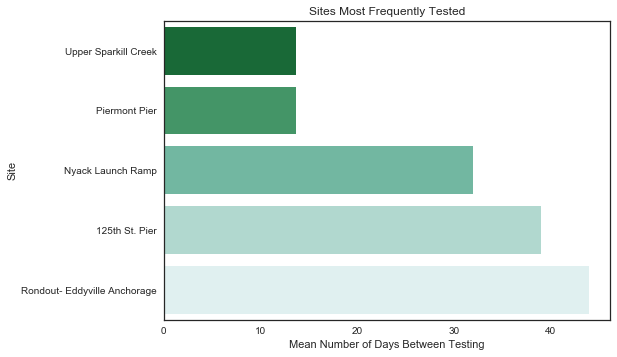

In [582]:
with plt.style.context('seaborn-white'):
    sns.barplot(y="Site", x="MeanDaysBetween", palette = "BuGn_r", data=Most)
    plt.title("Sites Most Frequently Tested")
    plt.xlabel("Mean Number of Days Between Testing")
    plt.show()

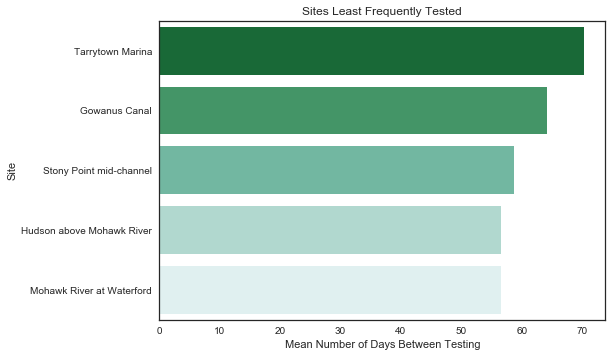

In [583]:
with plt.style.context('seaborn-white'):
    sns.barplot(y="Site", x="MeanDaysBetween", palette = "BuGn_r", data=Least)
    plt.title("Sites Least Frequently Tested")
    plt.xlabel("Mean Number of Days Between Testing")
    plt.show()

#### Is there a relationship between the amount of rain and water quality? Show this relationship graphically. If you can, estimate the effect of rain on quality at different sites and create a visualization to compare them.

In [584]:
df['FourDayRainTotal'].describe()

count    3397.000000
mean        0.568001
std         1.000387
min         0.000000
25%         0.000000
50%         0.200000
75%         0.700000
max         8.500000
Name: FourDayRainTotal, dtype: float64

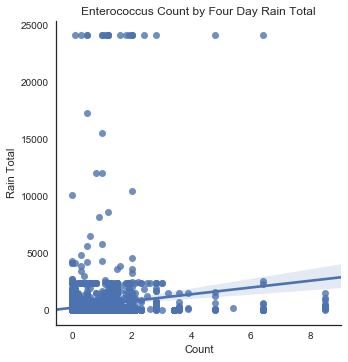

In [585]:
with plt.style.context('seaborn-white'):
    sns.lmplot('FourDayRainTotal', 'EnteroCount', palette = "BuGn_r", data=df)
    plt.title("Enterococcus Count by Four Day Rain Total")
    plt.xlabel("Count")
    plt.ylabel("Rain Total")
    plt.show()

In [586]:
rel = df
rel.groupby(['FourDayRainTotal']).agg({
    "EnteroCount": {"Min": "min", "Median": "median", "Max": "max"}
    
})


EnteroCount               
                         Max   Median   Min
FourDayRainTotal                           
0.0                    10112     10.0     1
0.1                    24196     20.0     0
0.2                     2420     13.0     1
0.3                    24196     10.0     1
0.4                     2987     11.0     1
0.5                    24196     15.5     1
0.6                     6488     13.0     1
0.7                     2420     12.0     1
0.8                    12030     11.0     1
0.9                     8160     26.0     1
1.0                    24196     24.0     1
1.1                    24196     41.0     1
1.2                    24196    229.5     6
1.3                     2420    525.0    10
1.4                     2420     30.0     1
1.5                     3654    129.0     4
1.6                    24196    136.5    10
1.7                     2220     74.0     5
1.8                    24196    686.0    10
1.9                    24196    674.5    10
2.0                    24196     86.0    10
2.1                     2420     54.0     4
2.2                     2481    147.0   110
2.3                     2420     40.5     2
2.4                    24196  13044.0  1892
2.5                     2420   1847.5  1275
2.6                     2420   1282.0   144
2.8                    24196    517.0    23
3.0                     2420   2420.0    24
3.2                     1500   1500.0  1500
3.4                       31     10.0    10
3.6                     1500    126.5     6
3.9                     1500    200.0    72
4.8                    24196    130.0    30
5.4                      213    213.0   213
6.4                    24196    103.0    10
8.5                     1496    274.0    10

There is a relationship between the Enterococcus count and the four day rain total. When the four day rain total is between 0-3 the Enterococcus counts are the lowest. 